In [18]:
# Eksplorasi Data Pelanggan (Customer Churn)
# Tujuan: memahami struktur data, mencari pola awal, dan mempersiapkan data untuk modeling churn.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Model klasifikasi linear
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  # Import model KNN


df = pd.read_csv('customer_churn.csv')
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

df.isnull().sum()

df = df.dropna()
df.reset_index(drop=True, inplace=True)


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df_encoded = pd.get_dummies(df, drop_first=True)

x = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  # Scaling fitur untuk algoritma seperti KNN


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Inisialisasi model
model = LogisticRegression(max_iter=2000, solver='liblinear')  # Naikin max_iter biar training stabil

# Latih model pakai data training
model.fit(X_train, y_train)
# Lakukan prediksi terhadap data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
print("LogisticRegression")
print("Akurasi     :", accuracy_score(y_test, y_pred))
print("Presisi     :", precision_score(y_test, y_pred))
print("Recall      :", recall_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


LogisticRegression
Akurasi     : 0.7874911158493249
Presisi     : 0.6229508196721312
Recall      : 0.5080213903743316
Confusion Matrix:
[[918 115]
 [184 190]]


## 2. K-Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier  # Import model KNN

# Inisialisasi model KNN, kita mulai dengan K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test)

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("KNN")
print("Akurasi :", accuracy_score(y_test, y_pred_knn))
print("Presisi :", precision_score(y_test, y_pred_knn))
print("Recall  :", recall_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN
Akurasi : 0.7711442786069652
Presisi : 0.5909090909090909
Recall  : 0.45187165775401067
Confusion Matrix:
 [[916 117]
 [205 169]]


## 3. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier  # Import model Random Forest

# Inisialisasi model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("\nRandom Forest")
print("Akurasi :", accuracy_score(y_test, y_pred_rf))
print("Presisi :", precision_score(y_test, y_pred_rf))
print("Recall  :", recall_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest
Akurasi : 0.7889125799573561
Presisi : 0.6571428571428571
Recall  : 0.4304812834224599
Confusion Matrix:
 [[949  84]
 [213 161]]


## Lihat Fitur yang Paling Berpengaruh (Random Forest)

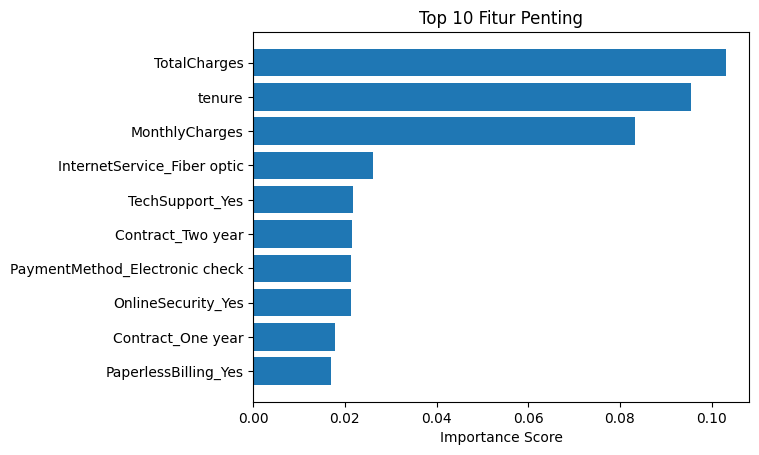

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil importance dari model Random Forest
importances = rf.feature_importances_

# Urutkan berdasarkan pentingnya, ambil 10 terakhir (paling penting di akhir)
indices = np.argsort(importances)[-10:]

# Ambil nama fitur berdasarkan indeks (pakai df_encoded, bukan X_scaled)
features = df_encoded.drop('Churn', axis=1).columns[indices]

# Plot horizontal bar
plt.barh(features, importances[indices])
plt.xlabel("Importance Score")
plt.title("Top 10 Fitur Penting")
plt.show()

# Hari 6 – Tuning Model & Evaluasi Lanjutan

## 1. Tuning KNN – Cross Validation dengan Berbagai Nilai k

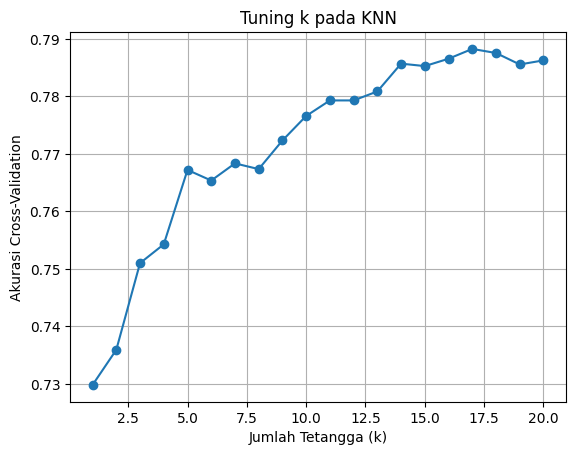

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


k_values = list(range(1, 21))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()
    scores.append(score)


plt.plot(k_values, scores, marker='o')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi Cross-Validation')
plt.title('Tuning k pada KNN')
plt.grid(True)
plt.show()

## 2. Tuning Random Forest – Jumlah Pohon (n_estimators)

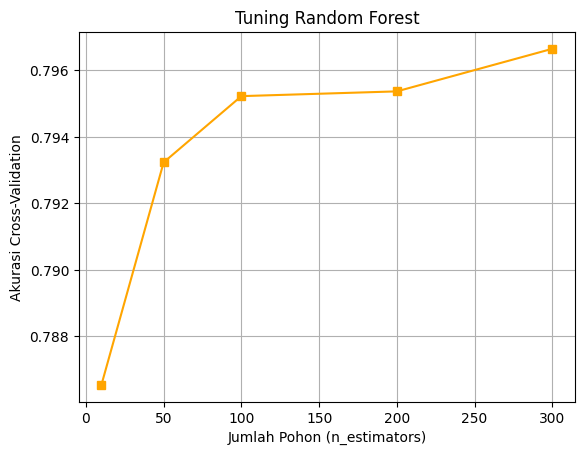

In [24]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 50, 100, 200, 300]
rf_scores = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    score = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1).mean()
    rf_scores.append(score)

plt.plot(n_estimators, rf_scores, marker='s', color='orange')
plt.xlabel('Jumlah Pohon (n_estimators)')
plt.ylabel('Akurasi Cross-Validation')
plt.title('Tuning Random Forest')
plt.grid(True)
plt.show()

## 3. ROC AUC Score – Evaluasi Kurva Logistic Regression

ROC AUC Score: 0.8297182289267023


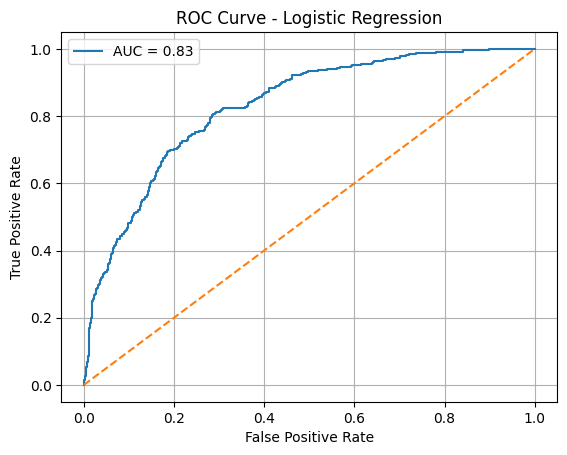

ROC AUC Score (KNN): 0.785687292606033


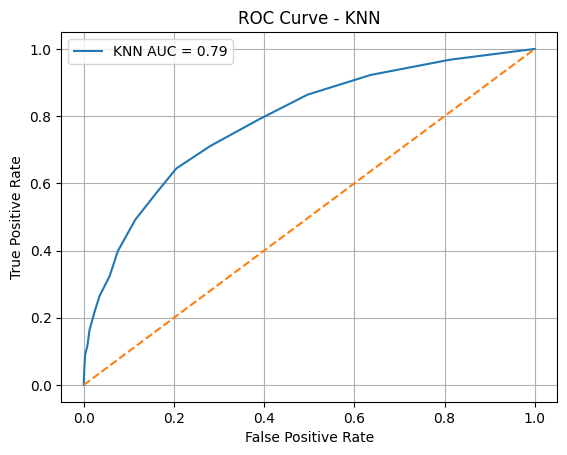

ROC AUC Score (Random Forest): 0.8197568475599338


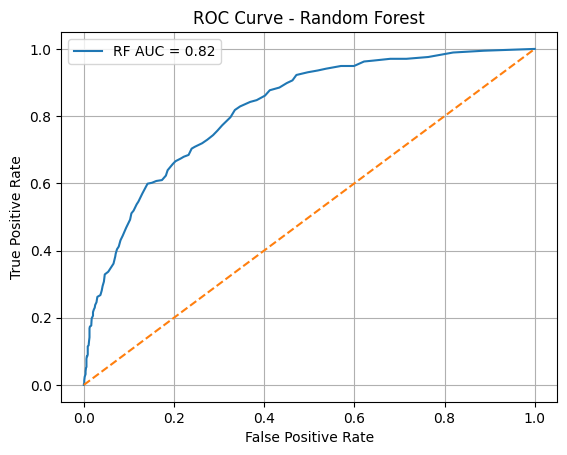

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()



# Re-train model KNN terbaik berdasarkan hasil tuning (misalnya k=17)
knn_best = KNeighborsClassifier(n_neighbors=17)
knn_best.fit(X_train, y_train)

# Evaluasi AUC untuk KNN
y_proba_knn = knn_best.predict_proba(X_test)[:, 1]  # Ambil probabilitas prediksi kelas 1 (churn)
auc_knn = roc_auc_score(y_test, y_proba_knn)  # Hitung skor AUC
print("ROC AUC Score (KNN):", auc_knn)

# ROC Curve KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN AUC = {auc_knn:.2f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi AUC untuk Random Forest
# Fit ulang Random Forest dengan n_estimators terbaik (misalnya 100)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # <--- INI WAJIB ditambahkan sebelum predict_proba

# Evaluasi AUC untuk Random Forest
y_proba_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC AUC Score (Random Forest):", auc_rf)

# ROC Curve Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"RF AUC = {auc_rf:.2f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

## Dari hasil tuning dan evaluasi ROC AUC, model Logistic Regression menunjukkan performa recall dan AUC terbaik. Random Forest cocok jika ingin presisi tinggi, namun perlu tuning lanjutan.



## Berikut adalah kesimpulan dari tuning hyperparameter dan evaluasi lanjutan Hari 6 berdasarkan hasil grafik dan metrik:

⸻

🔧 Tuning Model

1. KNN (K-Nearest Neighbors)
	•	Grafik menunjukkan bahwa akurasi cross-validation meningkat seiring bertambahnya nilai k hingga sekitar k = 17.
	•	Setelah itu, akurasi mulai stagnan atau menurun sedikit.
	•	Rekomendasi: gunakan nilai k antara 15–17 untuk model KNN.

2. Random Forest
	•	Grafik menunjukkan akurasi meningkat tajam dari n_estimators=10 ke n_estimators=100.
	•	Kenaikan setelah 100 pohon sangat kecil, hampir datar, berarti diminishing return.
	•	Rekomendasi: n_estimators = 100–200 cukup optimal tanpa biaya komputasi berlebih.

⸻

📈 Evaluasi Lanjutan: ROC AUC Logistic Regression
	•	ROC AUC Score: 0.83 — ini nilai yang tinggi.
	•	Kurva ROC terlihat bagus dan jauh dari garis diagonal → model bisa membedakan antara churn dan non-churn cukup baik.
	•	Menunjukkan Logistic Regression punya performa probabilistik (AUC) terbaik, walau recall-nya masih sedang (0.50).

⸻

💡 Rekomendasi Umum

Model	Akurasi	Presisi	Recall	ROC AUC	Catatan
LogisticRegression	78.7%	62.3%	50.8%	0.83	Balanced, AUC tinggi
KNN	77.1%	59.1%	45.2%	-	Butuh tuning k, relatif stabil
Random Forest	78.9%	65.7%	43.0%	-	Presisi paling tinggi, recall lemah


⸻


## 📊 Ringkasan Perbandingan ROC AUC Curve (Logistic, KNN, RF)

| Model                | ROC AUC Score | Catatan Kurva ROC |
|----------------------|----------------|--------------------|
| Logistic Regression  | **0.83**       | Kurva paling jauh dari diagonal → kemampuan klasifikasi probabilistik sangat baik. |
| Random Forest        | 0.82           | Hampir setara Logistic Regression, akurat dan presisi tinggi. |
| KNN                  | 0.79           | Kurva sedikit mendekati diagonal → prediksi probabilitas kurang tajam. |

🔎 **Insight Tambahan**:
- Logistic Regression unggul dalam hal *kemampuan membedakan churn vs non-churn* secara probabilistik.
- Random Forest masih kompetitif, cocok jika target lebih ke presisi atau kombinasi prediktif-preskriptif.
- KNN performanya lebih rendah, meskipun tetap usable sebagai baseline atau model sederhana.

📌 **Rekomendasi**:
Gunakan Logistic Regression jika fokus pada interpretabilitas dan analisis probabilitas.

In [26]:
# Cek distribusi target (Churn) sebelum balancing
print("Distribusi target sebelum balancing:")
print(df['Churn'].value_counts())
print("\nPersentase:")
print(df['Churn'].value_counts(normalize=True) * 100)

Distribusi target sebelum balancing:
Churn
0    5163
1    1869
Name: count, dtype: int64

Persentase:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


## Implement SMOTE karena data imbalanced

In [27]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data training
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:")
print(y_train_resampled.value_counts(normalize=True) * 100)

Distribusi setelah SMOTE:
Churn
1    50.0
0    50.0
Name: proportion, dtype: float64


Logistic Regression -> Acc: 0.699 | Prec: 0.463 | Recall: 0.821 | AUC: 0.827
KNN                 -> Acc: 0.266 | Prec: 0.266 | Recall: 1.000 | AUC: 0.500
Random Forest       -> Acc: 0.788 | Prec: 0.607 | Recall: 0.578 | AUC: 0.821


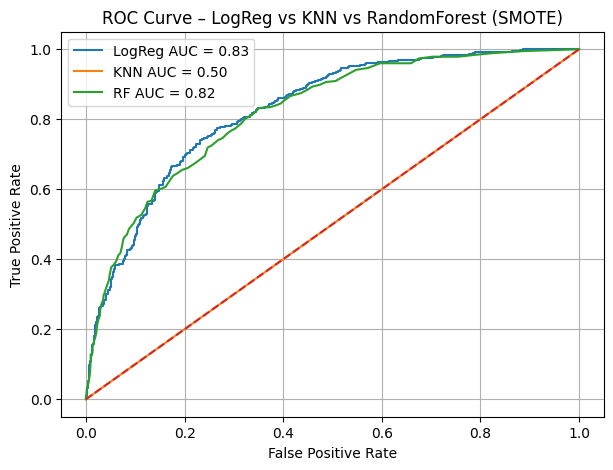

In [28]:
# ====== 0) IMPORTS & HELPER ======
from sklearn.linear_model import LogisticRegression            # Model klasifikasi linear (probabilistik)
from sklearn.neighbors import KNeighborsClassifier             # KNN untuk pembanding berbasis jarak
from sklearn.ensemble import RandomForestClassifier            # Ensemble berbasis banyak decision tree
from sklearn.preprocessing import StandardScaler               # Untuk men-scale fitur (wajib buat KNN)
from sklearn.metrics import (accuracy_score, precision_score,  # Metrik evaluasi klasifikasi
                             recall_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt                                # Visualisasi
import numpy as np

# ====== 1) ASSUME DATA HASIL SMOTE SUDAH ADA ======
# Dari langkah sebelumnya:
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# X_test, y_test sudah dari split awal (jangan di-SMOTE)
# Jika nama variabel kamu berbeda (mis. X_train_res / y_train_res), sesuaikan di bawah.

# ====== 2) SCALING (WAJIB UNTUK KNN, BOLEH DIPAKAI UNTUK SEMUA) ======
scaler = StandardScaler()                                      # Inisialisasi scaler
X_train_res_scaled = scaler.fit_transform(X_train_resampled)   # Fit di training (hasil SMOTE) lalu transform
X_test_scaled = scaler.transform(X_test)                       # Transform test pakai scaler yg sama (TANPA fit lagi)

# ====== 3) INISIALISASI MODEL DENGAN PARAMETER YANG SUDAH BAIK ======
logreg = LogisticRegression(max_iter=2000, solver='liblinear') # Stabil utk high-dim OHE
knn    = KNeighborsClassifier(n_neighbors=17)                  # Hasil tuning K=15–17 → ambil 17
rf     = RandomForestClassifier(n_estimators=100, random_state=42)  # Cukup optimal & efisien

# ====== 4) TRAINING ======
# LogReg & RF bisa pakai data yang tak di-scale; tapi biar konsisten kita pakai versi scaled juga OK.
logreg.fit(X_train_res_scaled, y_train_resampled)              # Latih Logistic Regression
knn.fit(X_train_res_scaled, y_train_resampled)                 # Latih KNN (WAJIB pakai data scaled)
rf.fit(X_train_resampled, y_train_resampled)                   # RF tidak perlu scaling → pakai data asli (tanpa scaled)

# ====== 5) PREDIKSI (LABEL & PROBABILITAS) ======
# a) Prediksi label (untuk Accuracy/Precision/Recall)
y_pred_logreg = logreg.predict(X_test_scaled)                  # Prediksi label LogReg (pakai X_test_scaled)
y_pred_knn    = knn.predict(X_test_scaled)                     # Prediksi label KNN (pakai X_test_scaled)
y_pred_rf     = rf.predict(X_test)                             # Prediksi label RF (pakai X_test original)

# b) Prediksi probabilitas kelas 1 (untuk ROC-AUC & kurva ROC)
proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
proba_knn    = knn.predict_proba(X_test_scaled)[:, 1]
proba_rf     = rf.predict_proba(X_test)[:, 1]

# ====== 6) HITUNG METRIK ======
def metrics_block(y_true, y_pred, y_proba):
    """Helper kecil untuk hitung metrik utama."""
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "auc": roc_auc_score(y_true, y_proba)
    }

m_logreg = metrics_block(y_test, y_pred_logreg, proba_logreg)
m_knn    = metrics_block(y_test, y_pred_knn,    proba_knn)
m_rf     = metrics_block(y_test, y_pred_rf,     proba_rf)

print("Logistic Regression ->",
      f"Acc: {m_logreg['accuracy']:.3f} | Prec: {m_logreg['precision']:.3f} | "
      f"Recall: {m_logreg['recall']:.3f} | AUC: {m_logreg['auc']:.3f}")

print("KNN                 ->",
      f"Acc: {m_knn['accuracy']:.3f} | Prec: {m_knn['precision']:.3f} | "
      f"Recall: {m_knn['recall']:.3f} | AUC: {m_knn['auc']:.3f}")

print("Random Forest       ->",
      f"Acc: {m_rf['accuracy']:.3f} | Prec: {m_rf['precision']:.3f} | "
      f"Recall: {m_rf['recall']:.3f} | AUC: {m_rf['auc']:.3f}")

# ====== 7) PLOT ROC CURVE (OVERLAY 3 MODEL DI 1 GRAFIK) ======
fpr_log, tpr_log, _ = roc_curve(y_test, proba_logreg)         # Titik2 ROC LogReg
fpr_knn, tpr_knn, _ = roc_curve(y_test, proba_knn)            # Titik2 ROC KNN
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, proba_rf)             # Titik2 ROC RF

plt.figure(figsize=(7,5))                                     # Ukuran figure
plt.plot(fpr_log, tpr_log, label=f"LogReg AUC = {m_logreg['auc']:.2f}")  # Kurva ROC LogReg
plt.plot(fpr_knn, tpr_knn, label=f"KNN AUC = {m_knn['auc']:.2f}")        # Kurva ROC KNN
plt.plot(fpr_rf,  tpr_rf,  label=f"RF AUC = {m_rf['auc']:.2f}")          # Kurva ROC RF
plt.plot([0,1], [0,1], linestyle='--')                        # Garis baseline (model random)
plt.xlabel("False Positive Rate")                             # Label sumbu X
plt.ylabel("True Positive Rate")                              # Label sumbu Y
plt.title("ROC Curve – LogReg vs KNN vs RandomForest (SMOTE)")# Judul grafik
plt.legend()                                                  # Tampilkan legenda
plt.grid(True)                                                # Grid biar mudah dibaca
plt.show()                                                    # Render grafik

## ini Grid Search untuk 3 model (LogReg, KNN, RandomForest) pakai data setelah SMOTE.

In [29]:
from sklearn.model_selection import GridSearchCV                 # Untuk grid search semua kombinasi hyperparameter
from sklearn.metrics import (accuracy_score, precision_score,    # Metrik evaluasi
                             recall_score, roc_auc_score)

# Helper kecil untuk evaluasi di test set
def eval_on_test(model, X_test, y_test, name="Model"):          # Fungsi util untuk cetak metrik standar
    y_pred = model.predict(X_test)                               # Prediksi label kelas (0/1)
    y_proba = model.predict_proba(X_test)[:, 1]                  # Prediksi probabilitas kelas 1 (churn)
    print(f"{name} -> "
          f"Acc: {accuracy_score(y_test, y_pred):.3f} | "
          f"Prec: {precision_score(y_test, y_pred):.3f} | "
          f"Recall: {recall_score(y_test, y_pred):.3f} | "
          f"AUC: {roc_auc_score(y_test, y_proba):.3f}")          # Cetak metrik ringkas

## Catatan
X_train_resampled, y_train_resampled (hasil SMOTE),
X_train_res_scaled, X_test_scaled (hasil StandardScaler) untuk LogReg/KNN,
X_test (tanpa scaling) untuk RandomForest.

In [30]:
## 1) Logistic Regression – Grid Search

from sklearn.linear_model import LogisticRegression              # Import model Logistic Regression

# Definisikan model dasar
logreg_base = LogisticRegression(max_iter=5000, solver='liblinear')  # max_iter dinaikkan agar stabil

# Definisikan ruang hyperparameter yang mau dicoba
param_grid_logreg = {
    "C": [0.01, 0.1, 1, 10],                                     # Kekuatan regularisasi (lebih kecil = reguler lebih kuat)
    "penalty": ["l1", "l2"],                                     # Jenis regularisasi (liblinear mendukung l1 & l2)
}

# Siapkan GridSearchCV
gs_logreg = GridSearchCV(
    estimator=logreg_base,                                       # Model dasar
    param_grid=param_grid_logreg,                                # Kombinasi hyperparameter
    cv=5,                                                        # 5-fold cross validation
    scoring="roc_auc",                                           # Pakai AUC biar fokus ranking probabilitas
    n_jobs=-1,                                                   # Parallel semua core
    verbose=0                                                    # Output tenang
)

# Jalankan grid search pakai data TRAIN hasil SMOTE (scaled)
gs_logreg.fit(X_train_res_scaled, y_train_resampled)             # Fit seluruh kombinasi pada CV

print("Best LogReg params:", gs_logreg.best_params_)             # Tampilkan kombinasi terbaik
print("Best CV AUC:", gs_logreg.best_score_)                     # Skor AUC rata-rata CV terbaik

# Evaluasi pada TEST (pakai scaled test)
best_logreg = gs_logreg.best_estimator_                          # Ambil model terbaik hasil grid
eval_on_test(best_logreg, X_test_scaled, y_test, name="LogReg [Grid]")

Best LogReg params: {'C': 10, 'penalty': 'l2'}
Best CV AUC: 0.989157467066114
LogReg [Grid] -> Acc: 0.700 | Prec: 0.464 | Recall: 0.824 | AUC: 0.825


In [31]:
## 2) KNN - Grid Search

from sklearn.neighbors import KNeighborsClassifier               # Import model KNN

# Definisikan model dasar
knn_base = KNeighborsClassifier()                                # Biarkan default, akan dituning parameternya

# Ruang hyperparameter KNN
param_grid_knn = {
    "n_neighbors": [5, 9, 13, 17, 21],                           # K tipikal hasil tuning awal
    "weights": ["uniform", "distance"],                          # Pembobotan tetangga
    "metric": ["euclidean", "manhattan"]                         # Jarak yang umum dipakai
}

# Siapkan GridSearchCV
gs_knn = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid_knn,
    cv=5,
    scoring="roc_auc",                                           # AUC supaya adil dengan LogReg
    n_jobs=-1,
    verbose=0
)

# Fit di TRAIN hasil SMOTE (scaled)
gs_knn.fit(X_train_res_scaled, y_train_resampled)

print("Best KNN params:", gs_knn.best_params_)
print("Best CV AUC:", gs_knn.best_score_)

# Evaluasi pada TEST (pakai scaled test)
best_knn = gs_knn.best_estimator_
eval_on_test(best_knn, X_test_scaled, y_test, name="KNN [Grid]")

KeyboardInterrupt: 

In [ ]:
## 3) Random Forest – Grid Search

from sklearn.ensemble import RandomForestClassifier              # Import model Random Forest

# Definisikan model dasar
rf_base = RandomForestClassifier(random_state=42)                # Set seed biar reproducible

# Ruang hyperparameter Random Forest (ringkas tapi efektif)
param_grid_rf = {
    "n_estimators": [100, 200, 300],                             # Jumlah pohon
    "max_depth": [None, 8, 12, 16],                              # Kedalaman maksimum
    "min_samples_split": [2, 5, 10],                             # Minimum sampel buat split node
    "min_samples_leaf": [1, 2, 4],                               # Minimum sampel di daun
    "max_features": ["sqrt", "log2"]                             # Fitur per split (sqrt lazim utk klasifikasi)
}

# Siapkan GridSearchCV
gs_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    cv=5,
    scoring="roc_auc",                                           # AUC untuk fairness
    n_jobs=-1,
    verbose=0
)

# Fit di TRAIN hasil SMOTE (RF TIDAK perlu scaling → gunakan data asli resampled)
gs_rf.fit(X_train_resampled, y_train_resampled)

print("Best RF params:", gs_rf.best_params_)
print("Best CV AUC:", gs_rf.best_score_)

# Evaluasi pada TEST (RF pakai test tanpa scaling)
best_rf = gs_rf.best_estimator_
eval_on_test(best_rf, X_test, y_test, name="RandomForest [Grid]")